In [1]:
# Parth "Repo Master" Korat
# Geoff Pawlowski
# Ashutosh Sawant

In [2]:
import scipy.stats as sts
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\Korat-PC\\Desktop\\DATA\\ucsd bootcamp\\projects\\bulldogs-project-1'

In [3]:
# Parth Korat
# Read in life expectancy dataset
life_expectancy_df = pd.read_csv("Resources\lifeExpectancyAtBirth.csv")

# columns in the dataset
life_expectancy_df.columns

Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip'], dtype='object')

In [4]:
# Parth Korat
# Set the Period as the index
life_expectancy_df_period = life_expectancy_df[life_expectancy_df['Dim1'] == 'Both sexes'].set_index('Period')

# Get the number of periods in a given country
life_expectancy_df_year = life_expectancy_df_period['Location'].value_counts()
life_expectancy_df_year

Canada                5
Vanuatu               4
Montenegro            4
Nicaragua             4
Italy                 4
                     ..
Lesotho               4
Israel                4
Comoros               4
Sudan (until 2011)    2
Sudan                 2
Name: Location, Length: 184, dtype: int64

In [5]:
# Parth Korat
# Find the number of countries with life expectancy data with more than 4 years
sum(life_expectancy_df_year >= 4)

182

In [6]:
# Parth Korat
# Remove countries with less than 4 years of life expectancy data
life_expectancy_df_clean = life_expectancy_df_period[life_expectancy_df_period['Location'].isin(
                            life_expectancy_df_year[life_expectancy_df_year >= 4].index)]
life_expectancy_df_clean.head()

,Location,Indicator,Dim1,First Tooltip
Period,,,,
2019,Afghanistan,Life expectancy at birth (years),Both sexes,63.21
2015,Afghanistan,Life expectancy at birth (years),Both sexes,61.65
2010,Afghanistan,Life expectancy at birth (years),Both sexes,59.94
2000,Afghanistan,Life expectancy at birth (years),Both sexes,54.99
2019,Albania,Life expectancy at birth (years),Both sexes,78.00


In [7]:
# Parth Korat
# total number of countries for each year
life_expectancy_df_clean.index.value_counts()

2000    182
2010    182
2015    182
2019    182
1920      1
Name: Period, dtype: int64

In [8]:
# Parth Korat
# Remove 1920 period from the data set
life_expectancy_df_clean = life_expectancy_df_clean.drop(1920)
life_expectancy_df_clean.index.value_counts()

2000    182
2010    182
2015    182
2019    182
Name: Period, dtype: int64

In [9]:
# Parth Korat
# Rename columns and reset the index
life_expectancy_df_clean.columns = ['Location', 'Indicator', 'Sex', 'Life Expectancy in Years']
life_expectancy_df_clean = life_expectancy_df_clean.reset_index()
life_expectancy_df_clean.describe()

,Period,Life Expectancy in Years
count,728.000000,728.000000
mean,2011.000000,70.218736
std,7.111221,8.689989
min,2000.000000,31.280000
25%,2007.500000,64.430000
50%,2012.500000,72.175000
75%,2016.000000,76.442500
max,2019.000000,84.260000


In [10]:
# Parth Korat
# Get mean life expectancy for each country for the past 9 years.
life_expectancy_df_sort = life_expectancy_df_clean.groupby('Location').mean()['Life Expectancy in Years'].sort_values()

### 10 countries with highest life expectancy

In [11]:
# Parth Korat
life_expectancy_df_sort.tail(10).to_frame()

,Life Expectancy in Years
Location,
Israel,81.1700
Cyprus,81.2300
Sweden,81.2550
Iceland,81.4625
Singapore,81.5425
Spain,81.5800
Italy,81.6100
Australia,81.7275
Switzerland,81.9925


### 10 countries with lowest life expectancy

In [12]:
# Parth Korat
life_expectancy_df_sort.head(10).to_frame()

,Life Expectancy in Years
Location,
Lesotho,48.4050
Central African Republic,49.1200
Eswatini,51.5650
Somalia,53.2225
Haiti,53.7475
Zimbabwe,54.3050
Mozambique,54.5650
Sierra Leone,55.2950
Zambia,56.0200



*In order to get a better indication of the life expectancy in different countries, we can use the geopandas library. This library will help us by creating a heatmap of the life expectancy of the most recent year 2019, in the dataset.*


In [13]:
# Parth Korat
# get the dataset in the library called naturalearth_lowres to compare with life expectancy
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [14]:
# Get the most recent year in the life expectancy dataset and drop the extra columns
mean_lifeexp = life_expectancy_df_clean[life_expectancy_df_clean['Period'] == 2019].drop(['Period', 'Indicator', 'Sex'], axis=1)

# Rename the Location column to name, so that the two datasets match up for merging.
mean_lifeexp = mean_lifeexp.rename(columns={'Location':'name'})
mean_lifeexp

,name,Life Expectancy in Years
0,Afghanistan,63.21
4,Albania,78.00
8,Algeria,77.13
12,Angola,63.06
16,Antigua and Barbuda,76.45
...,...,...
708,Venezuela (Bolivarian Republic of),73.95
712,Viet Nam,73.74
716,Yemen,66.63
720,Zambia,62.45


*Now there are 177 unique countries in the world dataset and 182 unique countries in the life expectancy dataset. Before the final merge, lets first see if there are any duplicate countries with different naming conventions*

In [15]:
# by doing a outer merge with the indicator on, we can see the countries that are missing in both datasets
life_world = pd.merge(mean_lifeexp, world, on='name', how='outer', indicator=True)
life_world = gpd.GeoDataFrame(life_world)

# first lets check to see if there are any unique countries that are only in the world dataset
life_world[life_world['_merge'].isin(['right_only'])]['name'].unique()

array(['Tanzania', 'W. Sahara', 'Dem. Rep. Congo', 'Sudan',
       'Dominican Rep.', 'Russia', 'Falkland Is.', 'Greenland',
       'Fr. S. Antarctic Lands', 'Bolivia', 'Venezuela', 'Puerto Rico',
       "Côte d'Ivoire", 'Central African Rep.', 'Eq. Guinea', 'eSwatini',
       'Palestine', 'Laos', 'Vietnam', 'North Korea', 'South Korea',
       'Iran', 'Syria', 'Moldova', 'New Caledonia', 'Solomon Is.',
       'Taiwan', 'United Kingdom', 'Brunei', 'Antarctica', 'N. Cyprus',
       'Somaliland', 'Bosnia and Herz.', 'Macedonia', 'Kosovo',
       'S. Sudan'], dtype=object)

In [16]:
# Now the life expectancy dataset
life_world[life_world['_merge'].isin(['left_only'])]['name'].unique()

array(['Antigua and Barbuda', 'Bahrain', 'Barbados',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Brunei Darussalam', 'Cabo Verde', 'Central African Republic',
       'Comoros', 'Côte d’Ivoire',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Dominican Republic',
       'Equatorial Guinea', 'Eswatini', 'Grenada',
       'Iran (Islamic Republic of)', 'Kiribati',
       "Lao People's Democratic Republic", 'Maldives', 'Malta',
       'Mauritius', 'Micronesia (Federated States of)',
       'Republic of Korea', 'Republic of Moldova',
       'The former Yugoslav Republic of Macedonia', 'Russian Federation',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa',
       'Sao Tome and Principe', 'Seychelles', 'Singapore',
       'Solomon Islands', 'South Sudan', 'Syrian Arab Republic', 'Tonga',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania',
       'Venezu

*By comparing both arrays, we can find the countries that are present in both datasets but have different naming conventions*

In [17]:
# Using the .replace() method on the life expectancy dataset to match up the names
mean_lifeexp = mean_lifeexp.replace(
    
    {'United Republic of Tanzania':'Tanzania', 'Democratic Republic of the Congo':'Dem. Rep. Congo',
     'Dominican Republic':'Dominican Rep.', 'Russian Federation':'Russia', 'Iran (Islamic Republic of)':'Iran',
     'Viet Nam':'Vietnam', "Democratic People's Republic of Korea":'North Korea', 'Republic of Korea':'South Korea',
     'United Kingdom of Great Britain and Northern Ireland':'United Kingdom', 'Venezuela (Bolivarian Republic of)':'Venezuela',
     'Equatorial Guinea':'Eq. Guinea', 'Syrian Arab Republic':'Syria'}
)

*Now we can finally merge both the datasets together. It is a outer merge again because the missing countries should be present in the world heatmap as light grey*

In [18]:
# Merge both datasets on the column name
life_world = pd.merge(mean_lifeexp, world, on='name', how='outer', indicator=True)
life_world = gpd.GeoDataFrame(life_world)

life_world['_merge'].value_counts()

both          153
left_only      29
right_only     24
Name: _merge, dtype: int64

*There are 153 countries present within both datasets for creating the life expectancy world heatmap. Then another 24 countries that will appear as light grey*

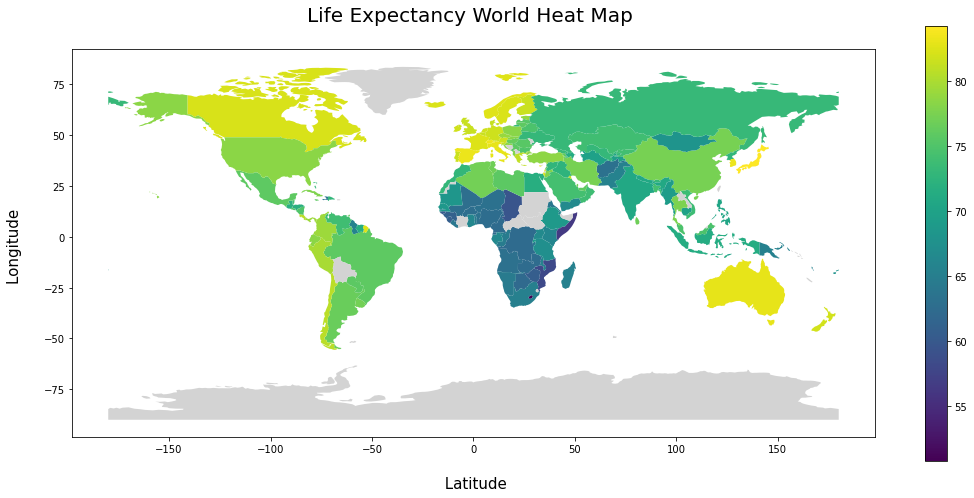

In [19]:
# Using .plot() method to plot the combined dataset on the Life Expectancy in Years. The legend on the right represents the Years
# of life in the year 2019. Yellow is the highest life expectancy and purple the lowest.
life_world.plot(
    column='Life Expectancy in Years', 
    figsize=(18, 8), 
    missing_kwds={'color':'lightgrey', 'label':'Missing values'}, 
    legend=True
)

# Add title and labels, then finally save the plot to the Output folder
plt.title('Life Expectancy World Heat Map \n', fontsize=20)
plt.ylabel('Longitude \n', fontsize=15)
plt.xlabel('\n Latitude', fontsize=15)
plt.savefig('Output/world.png', bbox_inches='tight')

# <center> What are we investigating? </center>
________________________________________________
* What types of societal indicators may be good predictors of any countries true life expectancy rate?
 * We found this question to be overly broad
 * Too many potential indicators to consider  
 * Difficult to extract something useful from something so expansive


* Narrowed focus – compare three (3) categories of likely indicators that may correlate with life expectancy and compare across them.

 * Access to healthcare
 * Access to basic infrastructure/sanitation services
 * Access to education


* Also identify any interesting findings in the data that could potentially be passed to a national government or non-profit organization who is focused on increasing life-expectancies across a population.
________________________________

## <center>Our Datasets</center>

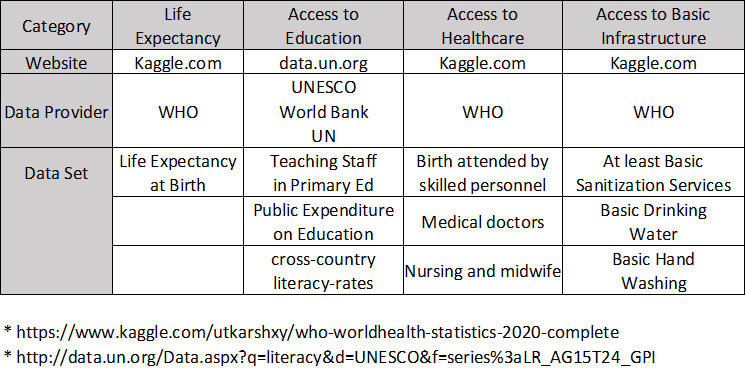



*We used 10 datasets with 1 outcome dataset. Together we used these for our 9 societal indicators*

### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
## Hand Washing Facilities vs Life Expectancy
**Is there a significant correlation between life expectancy and hand washing?**

In [20]:
# Parth Korat
# read basicHandWashing.csv
life_handwashing_df = pd.read_csv('Resources/Infrastructure/basicHandWashing.csv')
life_handwashing_df.head()

,Location,Indicator,Period,Dim1,First Tooltip
0,Afghanistan,Population with basic handwashing facilities a...,2017,Total,37.75
1,Afghanistan,Population with basic handwashing facilities a...,2017,Urban,63.58
2,Afghanistan,Population with basic handwashing facilities a...,2017,Rural,29.02
3,Afghanistan,Population with basic handwashing facilities a...,2016,Total,37.67
4,Afghanistan,Population with basic handwashing facilities a...,2016,Urban,63.58


In [21]:
# Parth Korat
# Drop Indicator and Dim1 column, and get Total for Dim1 only.
life_handwashing_df_clean = life_handwashing_df[life_handwashing_df['Dim1'] == 'Total'].drop(['Indicator', 'Dim1'], axis=1)
life_handwashing_df_clean['First Tooltip'].describe()

count    921.000000
mean      47.501911
std       32.774406
min        1.030000
25%       13.980000
50%       44.520000
75%       81.740000
max      100.000000
Name: First Tooltip, dtype: float64

Then using .replace() to pool together all Periods for the years 2019, 2015, 2010, 2000.

In [22]:
# Parth Korat
# using replace to change the Period values
life_handwashing_df_clean = life_handwashing_df_clean.replace([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 
                                                               2004, 2003, 2002, 2001, 2000], [2015, 2015, 2015, 2015, 2015, 2010, 2010, 2010, 
                                                                                               2010, 2010, 2000, 2000, 2000, 2000, 2000, 2000, 
                                                                                               2000, 2000])
# groupby the location and period to get the mean for each location and period.
life_handwashing_df_clean = life_handwashing_df_clean.merge(life_expectancy_df_clean, on=['Location', 'Period']).groupby(['Period', 'Location', 
                                                                                                                          'Life Expectancy in Years']).mean()

In [23]:
# Parth Korat
# change column name and get the dataframe
life_handwashing_df_clean.columns = ['Handwashing Facilities at Home (%)']
life_handwashing_df_clean = life_handwashing_df_clean.reset_index().groupby('Location').mean()
life_handwashing_df_clean[['Life Expectancy in Years', 'Handwashing Facilities at Home (%)']]

,Life Expectancy in Years,Handwashing Facilities at Home (%)
Location,,
Afghanistan,58.860000,37.252667
Algeria,76.195000,83.341500
Angola,59.895000,26.147000
Armenia,73.170000,89.189500
Azerbaijan,69.850000,83.240000
...,...,...
Vanuatu,64.580000,25.075000
Viet Nam,72.443333,85.381333
Yemen,67.585000,48.681000


In [24]:
# Parth Korat
# set the x and y data
x_handw_life = life_handwashing_df_clean['Handwashing Facilities at Home (%)']
y_handw_life = life_handwashing_df_clean['Life Expectancy in Years']

R-squared: 0.67
Pearsons correlation: 0.82


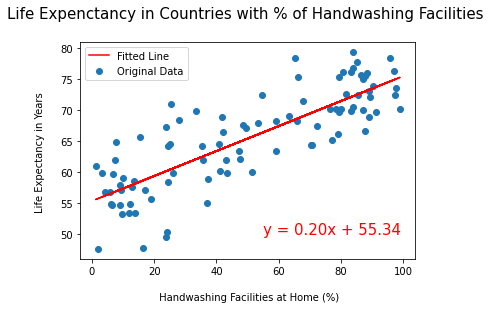

In [25]:
# Parth Korat
# use sts.linregress() to fit a linear model to the dataset
life_hres = sts.linregress(x_handw_life, y_handw_life)

# display the scatter plot of the handwashing vs life expectancy
plt.scatter(x_handw_life, y_handw_life, label='Original Data')

# display on the plot the linear regression model
y_hmodel = x_handw_life * life_hres.slope + life_hres.intercept
plt.plot(x_handw_life, y_hmodel, '-r', label='Fitted Line')

# create the equation
lin_eq_hw = f'y = {life_hres.slope:.2f}x + {life_hres.intercept:.2f}'

# show graph and legend
plt.legend()
plt.annotate(lin_eq_hw, (55, 50), fontsize=15, color='red')
plt.title('Life Expenctancy in Countries with % of Handwashing Facilities \n', fontsize=15)
plt.xlabel('\n Handwashing Facilities at Home (%)')
plt.ylabel('Life Expectancy in Years \n')
plt.show

# Get R-squared and Pearson Correlation coefficients
print(f'R-squared: {life_hres.rvalue**2:.2f}')
corr, _ = sts.pearsonr(x_handw_life, y_handw_life)
print(f'Pearsons correlation: {corr:.2f}')

# Save the figure in the Output folder
plt.savefig('Output/handwashing_life.png', bbox_inches='tight')

### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
## Drinking Water Facilities vs Life Expectancy
**Is there a significant correlation between life expectancy and avaliable drinking water?**

In [26]:
# Parth Korat
# read basicDrinkingWaterServices.csv
life_drinkingwater_df = pd.read_csv('Resources/Infrastructure/basicDrinkingWaterServices.csv')
life_drinkingwater_df.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Population using at least basic drinking-water...,57.32
1,Afghanistan,2016,Population using at least basic drinking-water...,54.84
2,Afghanistan,2015,Population using at least basic drinking-water...,52.39
3,Afghanistan,2014,Population using at least basic drinking-water...,49.96
4,Afghanistan,2013,Population using at least basic drinking-water...,47.56


In [27]:
# Parth Korat
# Drop Indicator column
life_drinkingwater_df_clean = life_drinkingwater_df.drop('Indicator', axis=1)
life_drinkingwater_df_clean['First Tooltip'].describe()

count    3455.000000
mean       77.847103
std        23.987570
min        10.130000
25%        59.895000
50%        87.650000
75%        98.460000
max       100.000000
Name: First Tooltip, dtype: float64

In [28]:
# Parth Korat
# using replace to change the Period values
life_drinkingwater_df_clean = life_drinkingwater_df_clean.replace([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 
                                                               2004, 2003, 2002, 2001, 2000], [2015, 2015, 2015, 2015, 2015, 2010, 2010, 2010, 
                                                                                               2010, 2010, 2000, 2000, 2000, 2000, 2000, 2000, 
                                                                                               2000, 2000])
# groupby the location and period to get the mean for each location and period.
life_drinkingwater_df_clean = life_drinkingwater_df_clean.merge(life_expectancy_df_clean, on=['Location', 'Period']).groupby(['Period', 'Location', 
                                                                                                                          'Life Expectancy in Years']).mean()

In [29]:
# Parth Korat
# change column name and get the dataframe
life_drinkingwater_df_clean.columns = ['Drinking Water Facilities at Home (%)']
life_drinkingwater_df_clean = life_drinkingwater_df_clean.reset_index().groupby('Location').mean()
life_drinkingwater_df_clean[['Life Expectancy in Years', 'Drinking Water Facilities at Home (%)']]

,Life Expectancy in Years,Drinking Water Facilities at Home (%)
Location,,
Afghanistan,58.860000,39.936750
Albania,75.880000,84.481250
Algeria,74.866667,86.651000
Angola,56.363333,24.684167
Antigua and Barbuda,75.550000,97.225000
...,...,...
Venezuela (Bolivarian Republic of),74.513333,96.133333
Viet Nam,72.443333,84.972667
Yemen,65.953333,42.239500


In [30]:
# Parth Korat
# set the x and y data
x_drinkw_life = life_drinkingwater_df_clean['Drinking Water Facilities at Home (%)']
y_drinkw_life = life_drinkingwater_df_clean['Life Expectancy in Years']

R-squared: 0.70
Pearsons correlation: 0.84


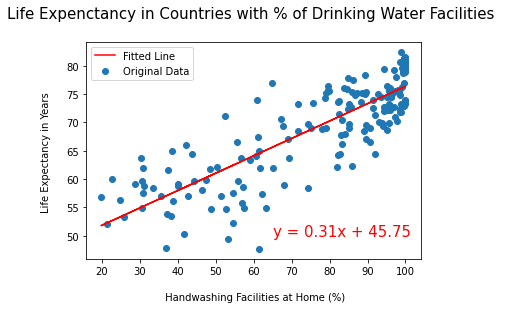

In [31]:
# Parth Korat
# use sts.linregress() to fit a linear model to the dataset
life_dres = sts.linregress(x_drinkw_life, y_drinkw_life)

# display the scatter plot of the handwashing vs life expectancy
plt.scatter(x_drinkw_life, y_drinkw_life, label='Original Data')

# display on the plot the linear regression model
y_dmodel = x_drinkw_life * life_dres.slope + life_dres.intercept
plt.plot(x_drinkw_life, y_dmodel, '-r', label='Fitted Line')

# create the equation
lin_eq_dw = f'y = {life_dres.slope:.2f}x + {life_dres.intercept:.2f}'

# show graph and legend
plt.legend()
plt.annotate(lin_eq_dw, (65, 50), fontsize=15, color='red')
plt.title('Life Expenctancy in Countries with % of Drinking Water Facilities \n', fontsize=15)
plt.xlabel('\n Handwashing Facilities at Home (%)')
plt.ylabel('Life Expectancy in Years \n')
plt.show

# Get R-squared and Pearson Correlation coefficients
print(f'R-squared: {life_dres.rvalue**2:.2f}')
corr, _ = sts.pearsonr(x_drinkw_life, y_drinkw_life)
print(f'Pearsons correlation: {corr:.2f}')

# Save the figure in the Output folder
plt.savefig('Output/drinkingwater_life.png', bbox_inches='tight')